In [52]:
import pandas as pd

In [53]:
data = pd.read_csv('loan_data.csv')

In [54]:
# Loan_ID : Unique Loan ID

# Gender : Male/ Female

# Married : Applicant married (Y/N)

# Dependents : Number of dependents

# Education : Applicant Education (Graduate/ Under Graduate)

# Self_Employed : Self employed (Y/N)

# ApplicantIncome : Applicant income

# CoapplicantIncome : Coapplicant income

# LoanAmount : Loan amount in thousands of dollars

# Loan_Amount_Term : Term of loan in months

# Credit_History : Credit history meets guidelines yes or no

# Property_Area : Urban/ Semi Urban/ Rural

# Loan_Status : Loan approved (Y/N) this is the target variable

In [55]:
data.shape

(614, 13)

In [56]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [57]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


- Get Information About Our Dataset Like Total Number of Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Check for null Values

In [59]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [60]:
data.isnull().mean() * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

# Handling the missing values
##### # if missing valus are less than 5% we drop them

In [61]:
data = data.drop('Loan_ID',axis=1)
#loan id column is not helping in our prediction we drop them

In [62]:
columns = ['Gender','Dependents','LoanAmount','Loan_Amount_Term']

In [63]:
data = data.dropna(subset=columns)

In [64]:
data.isnull().mean() *100

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        5.424955
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [65]:
# Handing other missing values > 5%

In [66]:
data['Self_Employed'].value_counts()

No     451
Yes     72
Name: Self_Employed, dtype: int64

In [67]:
data['Self_Employed'].mode()

0    No
Name: Self_Employed, dtype: object

In [68]:
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [69]:
data.isnull().mean() *100

Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     0.000000
Credit_History       8.679928
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [70]:
data['Credit_History'].unique()

array([ 1.,  0., nan])

In [71]:
data['Credit_History'].value_counts()

1.0    434
0.0     71
Name: Credit_History, dtype: int64

In [72]:
data['Credit_History'].mode()

0    1.0
Name: Credit_History, dtype: float64

In [73]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [74]:
data.isnull().mean() *100

Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

# Handing Categorical columns

In [75]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
224,Male,Yes,0,Graduate,No,6250,0.0,128.0,360.0,1.0,Semiurban,Y
606,Male,Yes,1,Graduate,No,3400,2500.0,173.0,360.0,1.0,Semiurban,Y
577,Male,No,0,Graduate,No,3229,2739.0,110.0,360.0,1.0,Urban,Y
408,Male,Yes,1,Graduate,No,8300,0.0,152.0,300.0,0.0,Semiurban,N
160,Male,Yes,0,Not Graduate,No,1863,1041.0,98.0,360.0,1.0,Semiurban,Y


In [76]:
data['Dependents'].value_counts()

0     316
1      96
2      96
3+     45
Name: Dependents, dtype: int64

In [77]:
data['Dependents'] = data['Dependents'].replace(to_replace='3+',value='4')

In [78]:
data['Dependents'].unique()

array(['1', '0', '2', '4'], dtype=object)

In [79]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [80]:
# Handling categorical values since ml algorithms only understands integer values

In [81]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0}).astype('int')

In [82]:
data['Gender'].unique()

array([1, 0])

In [83]:
data['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [84]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [85]:
data['Married'] = data['Married'].map({'Yes':1,'No':0}).astype('int')
data['Education'] = data['Education'].map({'Graduate':1,'Not Graduate':0}).astype('int')
data['Self_Employed'] = data['Self_Employed'].map({'Yes':1,'No':0}).astype('int')
data['Property_Area'] = data['Property_Area'].map({'Rural':0,'Semiurban':2,'Urban':1}).astype('int')
data['Loan_Status'] = data['Loan_Status'].map({'Y':1,'N':0}).astype('int')

In [86]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


# Separating Features and Target Variables

In [87]:
X = data.drop('Loan_Status',axis=1)

In [88]:
Y = data['Loan_Status']

In [89]:
# Feature Scaling

In [90]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


In [91]:
# In our data set values are not in the same range
# Feature scaling allow us to put our features in the same scale
# Features scaling is importatnt for ml to calculate the distance between the data 
# if features are not scale then features with high range start dominating features with low range

# ml algo that are distance based are affectd by feature scaling like linear regression , logistic regression , k nearest 
# not affected - decision tree etc

In [92]:
# Columns where we perform features scaling
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']

In [93]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
X[cols]=st.fit_transform(X[cols])

In [94]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,1,0,-0.128694,-0.049699,-0.214368,0.279961,1.0,0
2,1,1,0,1,1,-0.394296,-0.545638,-0.952675,0.279961,1.0,1
3,1,1,0,0,0,-0.464262,0.229842,-0.309634,0.279961,1.0,1
4,1,0,0,1,0,0.109057,-0.545638,-0.059562,0.279961,1.0,1
5,1,1,2,1,1,0.011239,0.834309,1.440866,0.279961,1.0,1


In [95]:
# Now our columns are in the same range

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             553 non-null    int32  
 1   Married            553 non-null    int32  
 2   Dependents         553 non-null    object 
 3   Education          553 non-null    int32  
 4   Self_Employed      553 non-null    int32  
 5   ApplicantIncome    553 non-null    int64  
 6   CoapplicantIncome  553 non-null    float64
 7   LoanAmount         553 non-null    float64
 8   Loan_Amount_Term   553 non-null    float64
 9   Credit_History     553 non-null    float64
 10  Property_Area      553 non-null    int32  
 11  Loan_Status        553 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(1)
memory usage: 43.2+ KB


In [97]:
data['Dependents']=data['Dependents'].astype('int')

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
corr_matrix=data.corr()

<AxesSubplot:>

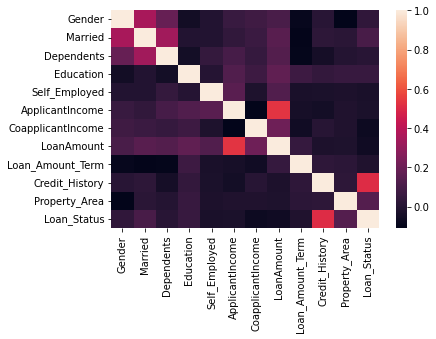

In [100]:
sns.heatmap(corr_matrix)

# Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

In [102]:
data['Loan_Status'].value_counts()

1    389
0    164
Name: Loan_Status, dtype: int64

In [103]:
# accuracy score and cross val score to check the accuracy of our model

In [104]:
# we have divided our data to 80% training and 20% testing
# but how do we know which 20% block is best for testing it can be anywhere in data so in cross validation we use them all for
# testing but one at a time and summarize the result at the end

In [105]:
model_df={}
def model_val(model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    # 5 fold cross validation
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

In [106]:
model_df

{}

# Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model_val(model,X,Y)

LogisticRegression() accuracy is 0.8018018018018018
LogisticRegression() Avg cross val score is 0.8047829647829647


In [108]:
model_df

{LogisticRegression(): 80.48}

# SVC

In [109]:
from sklearn import svm
model = svm.SVC()
model_val(model,X,Y)

SVC() accuracy is 0.7927927927927928
SVC() Avg cross val score is 0.7938902538902539


# Decision Tree Classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model_val(model,X,Y)

DecisionTreeClassifier() accuracy is 0.7567567567567568
DecisionTreeClassifier() Avg cross val score is 0.7143652743652743


# Random Forest Classifier

In [111]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
model_val(model,X,Y)

RandomForestClassifier() accuracy is 0.7477477477477478
RandomForestClassifier() Avg cross val score is 0.7957575757575757


# Gradient Boosting Classifier

In [112]:
from sklearn.ensemble import GradientBoostingClassifier
model =GradientBoostingClassifier()
model_val(model,X,Y)

GradientBoostingClassifier() accuracy is 0.7927927927927928
GradientBoostingClassifier() Avg cross val score is 0.7685503685503685


In [113]:
# here we can see logisctic regression gives best accuracy score
# here we train our model with default parameters but we can tune the model parameters called hyper parameter tunning

# Hyper parameter Tunning

There are two type of parameter
- Model parameter - model will learn this parameter in training phase - fixed parameters in case of linear regression y = mx + c , here slope m and intercept c are fixed parameters.
- Hyper parameter - these are adjustable parameters that must be tune in order to obtain a model with optimum performance.


ML algo can have many hyper parameter and finding best combination of hyper parameters can be treated as search problem
There are two best strategies for hyper parameter tunning
- grid search cv
- Randomise search cv

grid - it goes throgh all the intermediate combination of parameters which makes grid computationaly very expensive but 

randomise search cv solves the drowback of grid search cv as it goes through only fix number of hyper parametr settings it moves withing a grid in random passion to find best set of hyper parameter this way reduces the computation cost



In [114]:
from sklearn.model_selection import RandomizedSearchCV

# Logistic Regression

In [115]:
# now going to tune 2 parameters of logistic regression C and solver

In [116]:
log_reg_grid={"C":np.logspace(-4,4,20),
             "solver":['liblinear']}

In [117]:
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                   param_distributions=log_reg_grid,
                  n_iter=20,cv=5,verbose=True)

In [118]:
rs_log_reg.fit(X,Y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [119]:
rs_log_reg.best_score_

0.8047829647829647

In [120]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

# SVC

In [121]:
svc_grid = {'C':[0.25,0.50,0.75,1],"kernel":["linear"]}

In [122]:
rs_svc=RandomizedSearchCV(svm.SVC(),
                  param_distributions=svc_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [123]:
rs_svc.fit(X,Y)

C:\Users\Rinku Dave\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 4 is smaller than n_iter=20. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=20,
                   param_distributions={'C': [0.25, 0.5, 0.75, 1],
                                        'kernel': ['linear']},
                   verbose=True)

In [124]:
rs_svc.best_score_

0.8066011466011467

In [125]:
rs_svc.best_params_

{'kernel': 'linear', 'C': 0.25}

# Random Forest Classifier

In [126]:
RandomForestClassifier()

RandomForestClassifier()

In [127]:
rf_grid={'n_estimators':np.arange(10,1000,10),
  'max_features':['auto','sqrt'],
 'max_depth':[None,3,5,10,20,30],
 'min_samples_split':[2,5,20,50,100],
 'min_samples_leaf':[1,2,5,10]
 }

In [128]:
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                  param_distributions=rf_grid,
                   cv=5,
                   n_iter=20,
                  verbose=True)

In [129]:
rs_rf.fit(X,Y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 20, 50,
                                                              100],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 9

In [130]:
rs_rf.best_score_

0.8066011466011467

In [131]:
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 2,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 30}

# Save The Model

In [132]:
#thus the performnce of the model increases with hyper parameter tunning
# best performance is by random forest classifier lets train our entire data on random forest classifier

In [133]:
X = data.drop('Loan_Status',axis=1)
Y = data['Loan_Status']

In [134]:
rf = RandomForestClassifier(n_estimators=270,
 min_samples_split=5,
 min_samples_leaf=5,
 max_features='sqrt',
 max_depth=5)

In [135]:
rf.fit(X,Y)

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, n_estimators=270)